# 로지스틱 회귀 (생선 종류 예측하기)

> 생선의 길이, 높이, 두께, 대각선 길이, 무게를 사용해서 생선 종류 예측하기

* 생선의 특성값들을 이용해서 각 클래스별로 확률을 계산하고 생선의 종류를 분류하는 문제이다.
* 사용한 모델 : k-최근접 이웃 분류, 로지스틱 회귀

## k-최근접 이웃 분류

### 데이터 준비하기

In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 어떤 종류의 생선이 있는지 확인
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

print(fish_input.shape)
print(fish_target.shape)
print(fish_input[:5])

(159, 5)
(159,)
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
from sklearn.model_selection import train_test_split    

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled_input = ss.transform(train_input)
test_scaled_input = ss.transform(test_input)

print(train_scaled_input.shape, train_target.shape)
print(test_scaled_input.shape, test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


### 모델 생성

> k-최근접 이웃 분류

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled_input, train_target)

print(kn.score(train_scaled_input, train_target))
print(kn.score(test_scaled_input, test_target))

0.8907563025210085
0.85


In [7]:
# 사이킷런에서는 타깃값을 문자열 그대로 사용할 수 있다.
# 타깃값을 알파벳 순서대로 정렬하기 때문에 위에서 확인한 생선 종류의 순서와 달라질 수 있다.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
# 테스트 세트의 첫 5개 샘플의 예측을 출력
# predict() 메서드는 타깃값으로 예측을 출력한다.
print(kn.predict(test_scaled_input[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [9]:
import numpy as np

# 사이킷런의 predict_proba() 메서드는 클래스별로 확률값을 출력한다.
# 각 샘플들에 대해 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 순서로 확률값을 출력
proba = kn.predict_proba(test_scaled_input[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [10]:
# 4번째 샘플의 최근접 이웃 클래스를 확인
distances, indexes = kn.kneighbors(test_scaled_input[3:4])

# 4번째 샘플의 최근접 이웃 클래스는 ['Roach' 'Perch' 'Perch'] 이다.
# 따라서 위의 predict_proba() 메서드의 출력의 4번째 행이 위와 같이 나온 것이다.
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


k-최근접 이웃 분류 모델을 이용해서 생선의 특성들로 생선의 종류를 분류하는 문제를 해결했다.

하지만 k-최근접 이웃 분류 모델은 만약 k=3인 경우 가능한 확률은 0/3, 1/3, 2/3, 3/3 밖에 없다.

그 이유는 k-최근접 이웃 분류 알고리즘은 k개의 최근접 이웃들 중에서 존재하는 클래스들의 비율을 각 클래스의 확률로 계산하고, 가장 높은 확률의 클래스를 예측으로 출력하기 떄문이다.

## 로지스틱 회귀 (이진 분류)

로지스틱 회귀 모델은 선형 회귀 모델과 마찬가지로 선형 방정식을 학습한다.

선형 방정식은 각 특성들에 계수들을 곱한 것들과 절편의 합이다.

로지스틱 회귀 모델은 이 선형 방정식의 값을 확률로 매핑하기 위해서 시그모이드 함수 (또는 로지스틱 함수)를 사용한다.

### 시그모이드(sigmoid) 함수 또는 로지스틱(logistic) 함수

> 시그모이드 함수 (로지스틱 함수)

$$ f(z) = \frac{1}{1 + e^{-z}} $$

로지스틱 회귀 모델이 학습한 선형 방정식의 값을 z라고 할 때, 이 값을 입력받은 시그모이드 함수는 0에서 1사이의 값을 출력한다.

따라서 시그모이드 함수가 출력한 0에서 1사이의 값을 확률로 해석할 수 있다.

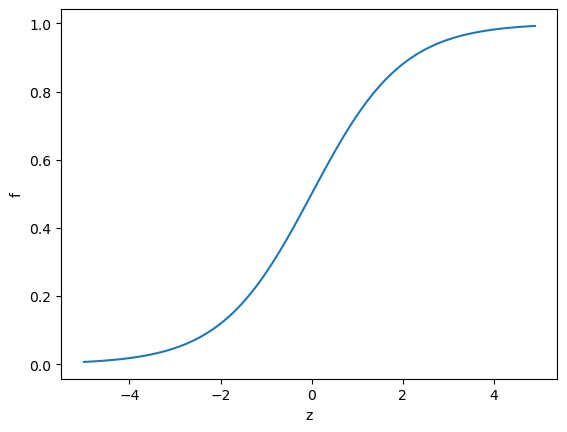

In [11]:
# 시그모이드 함수의 그래프 개형을 그리기
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
f = 1 / (1 + np.exp(-z))

plt.plot(z, f)
plt.xlabel("z")
plt.ylabel("f")
plt.show()

### 데이터 준비

In [12]:
# 로지스틱 회귀로 도미(Bream)와 빙어(Smelt)를 분류
bream_smelt_indexes = ((train_target == "Bream") | (train_target == "Smelt"))

train_bream_smelt_input = train_scaled_input[bream_smelt_indexes]
train_bream_smelt_target = train_target[bream_smelt_indexes]

print(train_bream_smelt_input.shape, train_bream_smelt_target.shape)

(33, 5) (33,)


### 모델 생성 및 검증

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt_input, train_bream_smelt_target)

# Bream이 음성 클래스, Smelt가 양성 클래스
print(lr.classes_)

# 훈련 세트의 처음 5개 샘플을 예측
print(lr.predict(train_bream_smelt_input[:5]))

['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [14]:
# 훈련 세트의 처음 5개 샘플의 클래스별 확률
print(lr.predict_proba(train_bream_smelt_input[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [15]:
# 로지스틱 회귀가 학습한 선형 방정식의 계수
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [16]:
# 로지스틱 회귀로 선형 방정식의 값 z를 출력
# 훈련 세트의 처음 5개 샘플의 z값
decisions = lr.decision_function(train_bream_smelt_input[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [17]:
# 위의 z값을 시그모이드 함수에 입력하면 predict_proba() 메서드로 얻은 확률 값을 얻을 수 있다.
# 양성 클래스에 대한 z값임을 확인할 수 있다.
# scipy 라이브러리에 시그모이드 함수가 있다.
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀 (다중 분류)

타깃 클래스의 개수가 2개 이상인 분류를 '다중 분류'라고 한다.

다중 분류를 위한 로지스틱 회귀 모델도 마찬가지로 선형 방정식을 학습한다.

이때 학습하는 선형 방정식의 개수는 타깃 클래스의 개수와 같다.

예를 들어서, 타깃 클래스가 7개면 선형 방정식의 개수도 7개이고 z값도 7개가 출력된다.

이진 분류를 위한 로지스틱 회귀 모델은 양성 클래스에 대한 선형 방정식만 학습하기 때문에 출력되는 z값이 1개 뿐인 것과 대조된다.

z값이 1개인 경우 단순히 시그모이드 함수를 이용해서 확률로 매핑하면 되었다.

하지만 z값이 여러개인 경우 모든 확률의 합이 1이 되도록 정규화를 해야 하는데, 이를 위해서 '소프트맥스(softmax) 함수'를 사용한다.

### 소프트맥스 함수

$$ P_{j} = \frac{e^{z_{j}}}{\sum_{j=1}^{k}e^{z_{j}}} \; j=1...K $$

In [18]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled_input, train_target)

print(lr.score(train_scaled_input, train_target))
print(lr.score(test_scaled_input, test_target))

0.9327731092436975
0.925


In [19]:
# 로지스틱 회귀 모델의 클래스
print(lr.classes_)

# 테스트 세트의 처음 5개 샘플에 대한 예측을 출력
print(lr.predict(test_scaled_input[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [20]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled_input[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [21]:
# 다중 분류 로지스틱 회귀 모델의 선형 방정식 계수
# 7개의 클래스, 5개의 특성을 사용하기 때문에 7개의 선형 방정식에 대한 계수들이 존재
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [22]:
# 테스트 세트의 처음 5개 샘플에 대해서 각각의 z값(7개)을 구하기
decisions = lr.decision_function(test_scaled_input[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [23]:
# 소프트맥스 함수로 z값을 확률로 매핑
from scipy.special import softmax

proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
